# **Part 0: Prepartion required before doing anything in Google Colab**

Before doing anything, we need to mount the Google Drive when we are using Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install the necessary libraries and packages to be safe

In [2]:
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy

# **Part 1: Data Exploration and Preparation**

Import pandas

In [3]:
import pandas as pd

Set the maximum number of column to display as None

In [4]:
pd.set_option('display.max_columns', None)

Load train.csv file using pandas

In [5]:
training_set = pd.read_csv("/content/drive/MyDrive/COMP4211PA1/train.csv")
training_set = pd.DataFrame(data = training_set)

### **[Q1] Dataset Overview.**
* Size of the Dataset: Total number of instances and features
* Feature Types: Identify numerical and categorical features

Visualize the training set

In [6]:
training_set

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,regression target,classification target
0,divorced,Holders of other higher courses,second choice,Management,daytime,Higher education - degree,65.00,Portuguese,no,no,no,yes,female,no,35,no,0,5.0,5,0,0.000000,0,0.0,5.0,5,0.0,0.000000,0,11.1,0.6,2.02,0.6500,failure
1,single,Over 23 years old,second choice,Veterinary Nursing,daytime,Secondary education,65.00,Portuguese,no,no,no,yes,NaN,yes,25,no,0,6.0,13,3,11.666667,0,0.0,6.0,14,2.0,11.333333,0,11.1,0.6,2.02,0.5500,success
2,single,1st phase - general contingent,seventh choice,Communication Design,daytime,Frequency of higher education,59.50,Portuguese,yes,no,no,yes,male,no,22,no,0,6.0,6,6,14.166667,0,0.0,6.0,8,6.0,13.625000,0,10.8,1.4,1.74,0.6160,success
3,married,Over 23 years old,second choice,Social Service,daytime,Basic education 3rd cycle (9th/10th/11th year)...,66.55,Portuguese,no,no,no,yes,male,no,42,no,0,6.0,0,0,0.000000,0,0.0,6.0,0,0.0,0.000000,0,15.5,2.8,-4.06,0.5175,failure
4,single,1st phase - general contingent,fourth choice,Nursing,daytime,Secondary education,71.00,Portuguese,yes,no,no,yes,female,yes,22,no,0,7.0,7,6,NaN,0,0.0,7.0,7,6.0,13.900000,0,7.6,2.6,0.32,0.6865,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,single,1st phase - general contingent,third choice,Communication Design,daytime,Secondary education,67.00,Portuguese,yes,no,no,no,female,no,18,NaN,1,6.0,8,6,11.714286,1,0.0,6.0,11,4.0,11.333333,0,13.9,NaN,0.79,0.6385,failure
3535,single,1st phase - general contingent,second choice,Basic Education,daytime,Secondary education,66.50,Portuguese,yes,no,no,yes,female,no,20,no,0,6.0,9,5,14.333333,0,4.0,8.0,8,8.0,12.625000,0,15.5,2.8,-4.06,0.6565,success
3536,single,1st phase - general contingent,second choice,Social Service (evening attendance),evening,Secondary education,50.00,Portuguese,no,no,no,yes,female,yes,23,no,0,6.0,6,6,14.166667,0,0.0,6.0,6,NaN,12.500000,0,12.7,3.7,-1.70,0.5640,success
3537,single,1st phase - general contingent,fifth choice,Social Service,daytime,Secondary education,63.50,Portuguese,yes,no,no,yes,female,yes,19,no,0,6.0,6,6,13.500000,0,0.0,6.0,7,6.0,13.428571,0,11.1,0.6,2.02,0.6020,success


### **[Q2] Missing Values**
* Identification: Report any features with missing values and the proportion of missing values for them
* Potential Impact: Briefly discuss how these missing values might affect analysis and model performance

Print a concise summary of the training set

In [7]:
training_set.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   C0                     3510 non-null   object 
 1   C1                     3539 non-null   object 
 2   C2                     3539 non-null   object 
 3   C3                     3539 non-null   object 
 4   C4                     3490 non-null   object 
 5   C5                     3431 non-null   object 
 6   C6                     3539 non-null   float64
 7   C7                     3539 non-null   object 
 8   C8                     3457 non-null   object 
 9   C9                     3397 non-null   object 
 10  C10                    3539 non-null   object 
 11  C11                    3381 non-null   object 
 12  C12                    3369 non-null   object 
 13  C13                    3419 non-null   object 
 14  C14                    3539 non-null   int64  
 15  C15 

Show the number of missing values for each feature

In [8]:
training_set.isnull().sum()

C0                        29
C1                         0
C2                         0
C3                         0
C4                        49
C5                       108
C6                         0
C7                         0
C8                        82
C9                       142
C10                        0
C11                      158
C12                      170
C13                      120
C14                        0
C15                      138
C16                        0
C17                      148
C18                        0
C19                        0
C20                      171
C21                        0
C22                       16
C23                       28
C24                        0
C25                      144
C26                        0
C27                        0
C28                        0
C29                      160
C30                        0
regression target          0
classification target      0
dtype: int64

### **[Q3] Feature Distribution**
* Numerical Features: Identify which ones are discrete or continuous.
Describe the distribution (e.g., mean, median, range, variance) of the first 3 numerical features and visualize their distributions using box plots
* Categorical Features: Identify which ones are binary, nominal, or ordinal. Summarize the categories count of the first 3 categorical features and visualize their distributions using bar plots

Print a concise summary of the training set

In [9]:
training_set

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,regression target,classification target
0,divorced,Holders of other higher courses,second choice,Management,daytime,Higher education - degree,65.00,Portuguese,no,no,no,yes,female,no,35,no,0,5.0,5,0,0.000000,0,0.0,5.0,5,0.0,0.000000,0,11.1,0.6,2.02,0.6500,failure
1,single,Over 23 years old,second choice,Veterinary Nursing,daytime,Secondary education,65.00,Portuguese,no,no,no,yes,NaN,yes,25,no,0,6.0,13,3,11.666667,0,0.0,6.0,14,2.0,11.333333,0,11.1,0.6,2.02,0.5500,success
2,single,1st phase - general contingent,seventh choice,Communication Design,daytime,Frequency of higher education,59.50,Portuguese,yes,no,no,yes,male,no,22,no,0,6.0,6,6,14.166667,0,0.0,6.0,8,6.0,13.625000,0,10.8,1.4,1.74,0.6160,success
3,married,Over 23 years old,second choice,Social Service,daytime,Basic education 3rd cycle (9th/10th/11th year)...,66.55,Portuguese,no,no,no,yes,male,no,42,no,0,6.0,0,0,0.000000,0,0.0,6.0,0,0.0,0.000000,0,15.5,2.8,-4.06,0.5175,failure
4,single,1st phase - general contingent,fourth choice,Nursing,daytime,Secondary education,71.00,Portuguese,yes,no,no,yes,female,yes,22,no,0,7.0,7,6,NaN,0,0.0,7.0,7,6.0,13.900000,0,7.6,2.6,0.32,0.6865,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,single,1st phase - general contingent,third choice,Communication Design,daytime,Secondary education,67.00,Portuguese,yes,no,no,no,female,no,18,NaN,1,6.0,8,6,11.714286,1,0.0,6.0,11,4.0,11.333333,0,13.9,NaN,0.79,0.6385,failure
3535,single,1st phase - general contingent,second choice,Basic Education,daytime,Secondary education,66.50,Portuguese,yes,no,no,yes,female,no,20,no,0,6.0,9,5,14.333333,0,4.0,8.0,8,8.0,12.625000,0,15.5,2.8,-4.06,0.6565,success
3536,single,1st phase - general contingent,second choice,Social Service (evening attendance),evening,Secondary education,50.00,Portuguese,no,no,no,yes,female,yes,23,no,0,6.0,6,6,14.166667,0,0.0,6.0,6,NaN,12.500000,0,12.7,3.7,-1.70,0.5640,success
3537,single,1st phase - general contingent,fifth choice,Social Service,daytime,Secondary education,63.50,Portuguese,yes,no,no,yes,female,yes,19,no,0,6.0,6,6,13.500000,0,0.0,6.0,7,6.0,13.428571,0,11.1,0.6,2.02,0.6020,success


The general overview of the distribution of the numerical features and regression target

In [10]:
training_set.describe()

,C6,C14,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,regression target
count,3539.000000,3539.000000,3539.000000,3391.000000,3539.000000,3539.000000,3368.000000,3539.000000,3523.000000,3511.000000,3539.000000,3395.000000,3539.000000,3539.000000,3539.000000,3379.000000,3539.000000,3539.000000
mean,66.324696,23.204012,0.683526,6.242996,8.248375,4.693416,10.624829,0.131958,0.522566,6.182284,8.021475,4.420029,10.227644,0.144956,11.563182,1.235218,0.008918,0.634260
std,6.619953,7.427675,2.275012,2.475471,4.202098,3.064981,4.852394,0.678628,1.853137,2.192147,3.954674,2.994448,5.212690,0.739088,2.669147,1.381189,2.273285,0.072428
min,47.500000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.475000
25%,62.500000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000,0.589000
50%,66.550000,20.000000,0.000000,6.000000,8.000000,5.000000,12.328175,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,0.630500
75%,70.000000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,0.673500
max,95.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,18.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,0.950000




---

***Numerical Features***

Extract the first three numerical features, which are columns C6, C14, C16

In [11]:
C6_feature = training_set['C6']
C14_feature = training_set['C14']
C16_feature = training_set['C16']

The distribution of feature C6:

In [12]:
print("Distribution of feature C6:")
print(C6_feature.describe())
print("Mean of feature C6: ", C6_feature.describe().loc['mean'])
print("Median of feature C6: ", C6_feature.describe().loc['50%'])
print("Range of feature C6: ", C6_feature.describe().loc['max'] - C6_feature.describe().loc['min'])
print("Variance of feature C6: ", C6_feature.describe().loc['std'] ** 2)

Distribution of feature C6:
count    3539.000000
mean       66.324696
std         6.619953
min        47.500000
25%        62.500000
50%        66.550000
75%        70.000000
max        95.000000
Name: C6, dtype: float64
Mean of feature C6:  66.32469624187623
Median of feature C6:  66.55
Range of feature C6:  47.5
Variance of feature C6:  43.82377516915207


The box plot of feature C6:

<Axes: title={'center': 'Distribution of feature C6'}>

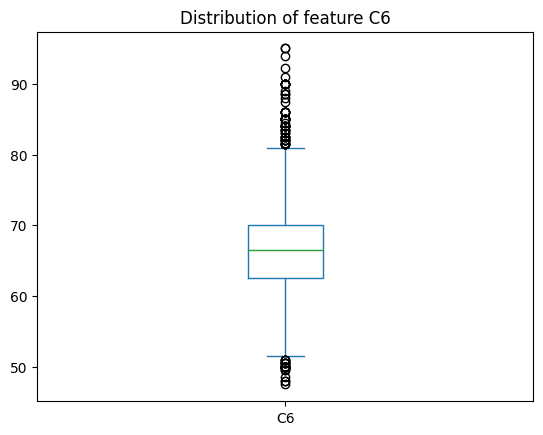

In [13]:
C6_feature.plot.box(title = "Distribution of feature C6")

The distribution of feature C14:

In [14]:
print("Distribution of feature C14:")
print(C14_feature.describe())
print("Mean of feature C14: ", C14_feature.describe().loc['mean'])
print("Median of feature C14: ", C14_feature.describe().loc['50%'])
print("Range of feature C14: ", C14_feature.describe().loc['max'] - C14_feature.describe().loc['min'])
print("Variance of feature C14: ", C14_feature.describe().loc['std'] ** 2)

Distribution of feature C14:
count    3539.000000
mean       23.204012
std         7.427675
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: C14, dtype: float64
Mean of feature C14:  23.204012432890647
Median of feature C14:  20.0
Range of feature C14:  53.0
Variance of feature C14:  55.17035133506302


The box plot of feature C14:

<Axes: title={'center': 'Distribution of feature C14'}>

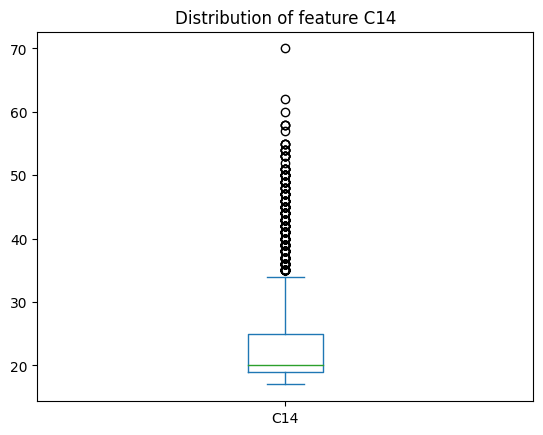

In [15]:
C14_feature.plot.box(title = "Distribution of feature C14")

The distribution of feature C16:

In [16]:
print("Distribution of feature C16:")
print(C16_feature.describe())
print("Mean of feature C16: ", C16_feature.describe().loc['mean'])
print("Median of feature C16: ", C16_feature.describe().loc['50%'])
print("Range of feature C16: ", C16_feature.describe().loc['max'] - C16_feature.describe().loc['min'])
print("Variance of feature C16: ", C16_feature.describe().loc['std'] ** 2)

Distribution of feature C16:
count    3539.000000
mean        0.683526
std         2.275012
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: C16, dtype: float64
Mean of feature C16:  0.6835264198926251
Median of feature C16:  0.0
Range of feature C16:  20.0
Variance of feature C16:  5.175678233544303


The box plot of feature C16:

<Axes: title={'center': 'Distribution of feature C16'}>

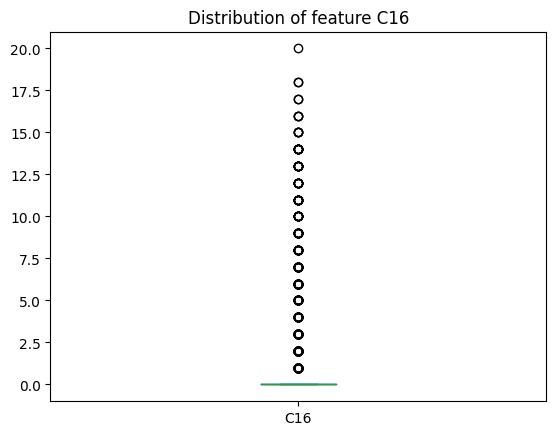

In [17]:
C16_feature.plot.box(title = "Distribution of feature C16")



---

***Categorical Features***

Extract the first three categorical features, which are columns C0, C1, C2

In [18]:
C0_feature = training_set['C0']
C1_feature = training_set['C1']
C2_feature = training_set['C2']

The categories count of feature C0:

In [19]:
print("The categories count of feature C0:")
print(C0_feature.value_counts(sort = True, dropna = False))

The categories count of feature C0:
single               3115
married               296
divorced               75
NaN                    29
facto union            18
legally separated       3
widower                 3
Name: C0, dtype: int64


The bar plot of feature C0:

Axes(0.125,0.11;0.775x0.77)


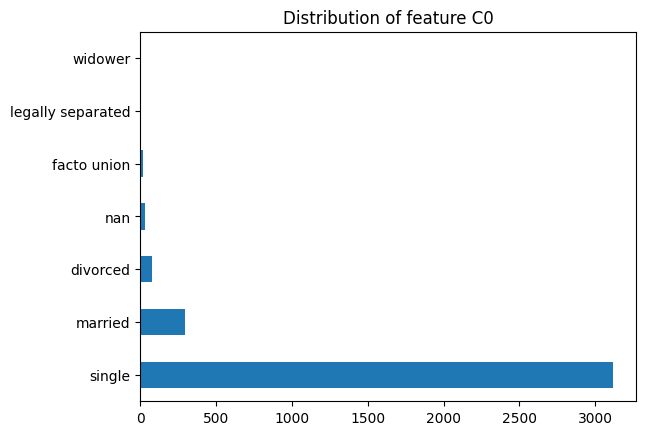

In [20]:
print(C0_feature.value_counts(sort = True, dropna = False).plot(kind = "barh", title = "Distribution of feature C0"))

The categories count of feature C1:

In [21]:
print("The categories count of feature C1:")
print(C1_feature.value_counts(sort = True, dropna = False))

The categories count of feature C1:
1st phase - general contingent                         1351
2nd phase - general contingent                          708
Over 23 years old                                       630
Change of course                                        253
Technological specialization diploma holders            160
Holders of other higher courses                         109
3rd phase - general contingent                          105
Transfer                                                 67
Change of institution/course                             45
Short cycle diploma holders                              30
1st phase - special contingent (Madeira Island)          29
International student (bachelor)                         26
1st phase - special contingent (Azores Island)           14
Ordinance No. 854-B/99                                    7
Ordinance No. 612/93                                      2
Ordinance No. 533-A/99, item b3 (Other Institution)       1
Ordi

The bar plot of feature C1:

Axes(0.125,0.11;0.775x0.77)


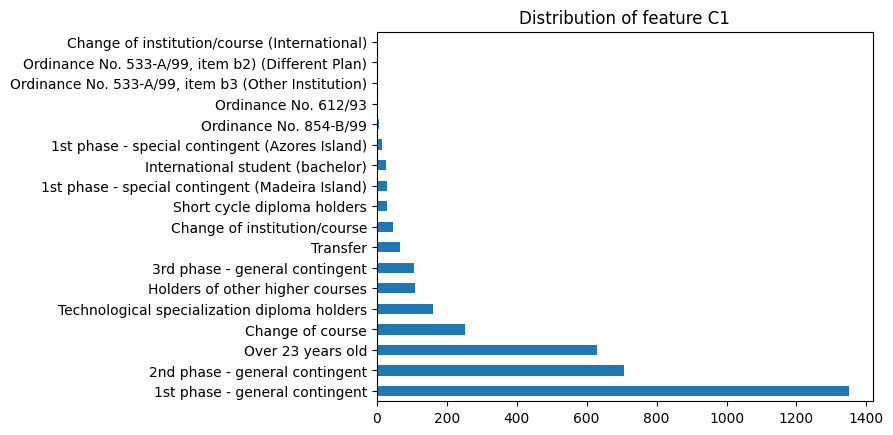

In [22]:
print(C1_feature.value_counts(sort = True, dropna = False).plot(kind = "barh", title = "Distribution of feature C1"))

The categories count of feature C2:

In [23]:
print("The categories count of feature C2:")
print(C2_feature.value_counts(sort = True, dropna = False))

The categories count of feature C2:
second choice     2402
third choice       457
fourth choice      247
fifth choice       194
sixth choice       125
seventh choice     112
last choice          1
first choice         1
Name: C2, dtype: int64


The bar plot of feature C2:

Axes(0.125,0.11;0.775x0.77)


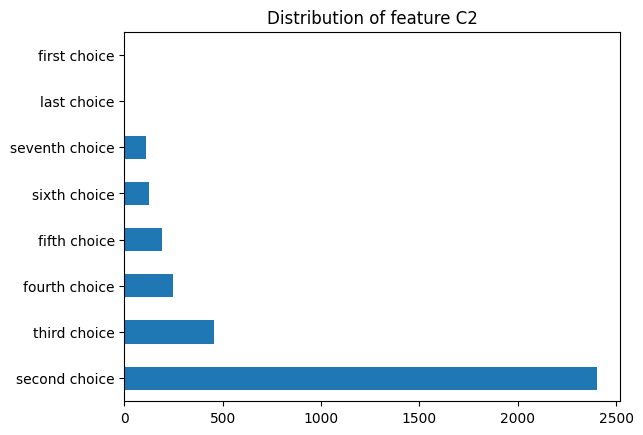

In [24]:
print(C2_feature.value_counts(sort = True, dropna = False).plot(kind = "barh", title = "Distribution of feature C2"))

### **[Q4] Outliers**
* Detection: Identify potential outliers in the first 3 numerical features. You can use scikit-learn or scipy to help you. Please show the results of at least two outlier detection methods.
* Consideration: Briefly discuss how outliers might affect your preprocessing and modeling strategy.

Recall the first three numerical features are C6, C14, C16

*Method 1: Z-Score*

Detect potential outliers of feature C6, C14, C16 using Z-Score

In [25]:
C6_feature_outlierM1 = training_set['C6']
C14_feature_outlierM1 = training_set['C14']
C16_feature_outlierM1 = training_set['C16']

In [26]:
import numpy as np
from scipy import stats

# Set the Z-Score threshold as 4
z_score_threshold = 4

print("Treat the numerical data with Z > 4 or Z < -4 as outliers")


# Detect potential outliers of feature C6 using Z-Score
C6_z_score = np.abs(stats.zscore(C6_feature_outlierM1))

C6_z_score_outliers = C6_feature_outlierM1[C6_z_score > z_score_threshold]
print("\nThe potential outliers of feature C6 are:")
print("N-th instances\tvalue")
print(C6_z_score_outliers)


# Detect potential outliers of feature C14 using Z-Score
C14_z_score = np.abs(stats.zscore(C14_feature_outlierM1))

C14_z_score_outliers = C14_feature_outlierM1[C14_z_score > z_score_threshold]
print("\nThe potential outliers of feature C14 are:")
print("N-th instances\tvalue")
print(C14_z_score_outliers)


# Detect potential outliers of feature C16 using Z-Score
C16_z_score = np.abs(stats.zscore(C16_feature_outlierM1))

C16_z_score_outliers = C16_feature_outlierM1[C16_z_score > z_score_threshold]
print("\nThe potential outliers of feature C16 are:")
print("N-th instances\tvalue")
print(C16_z_score_outliers)

Treat the numerical data with Z > 4 or Z < -4 as outliers

The potential outliers of feature C6 are:
N-th instances	value
1156    95.0
2282    94.0
3373    95.0
Name: C6, dtype: float64

The potential outliers of feature C14 are:
N-th instances	value
394     58
513     53
553     57
985     53
1244    54
1316    60
1388    55
1581    53
1647    54
1756    58
1891    55
2260    54
2450    53
2509    70
2827    54
2895    58
3048    53
3075    55
3077    55
3126    53
3187    62
3343    54
Name: C14, dtype: int64

The potential outliers of feature C16 are:
N-th instances	value
18      11
152     18
173     13
337     15
362     10
        ..
3068    11
3086    13
3273    14
3470    11
3500    11
Name: C16, Length: 68, dtype: int64




---



*Method 2: Interquartile Range (IQR)*

Detect potential outliers of feature C6, C14, C16 using Interquartile Range (IQR)

In [27]:
C6_feature_outlierM2 = training_set['C6']
C14_feature_outlierM2 = training_set['C14']
C16_feature_outlierM2 = training_set['C16']

In [28]:
# Set the IQR threshold as 2.5
IQR_threshold = 2.5

print("Treat the numerical data outside the range of 2.5 times the IQR below the lower quartile or 2.5 times the IQR above the upper quartile as potential outliers")


# Find the IQR of feature C6
C6_lower_quartile = C6_feature_outlierM2.quantile(0.25)
C6_upper_quartile = C6_feature_outlierM2.quantile(0.75)
C6_IQR = C6_upper_quartile - C6_lower_quartile

# Show the potential outliers of feature C6 using IQR
C6_IQR_outliers = C6_feature_outlierM2[(C6_feature_outlierM2 < C6_lower_quartile - IQR_threshold * C6_IQR) | (C6_feature_outlierM2 > C6_upper_quartile + IQR_threshold * C6_IQR)]
print("\nThe potential outliers of feature C6 are:")
print("N-th instances\tvalue")
print(C6_IQR_outliers)


# Find the IQR of feature C14
C14_lower_quartile = C14_feature_outlierM2.quantile(0.25)
C14_upper_quartile = C14_feature_outlierM2.quantile(0.75)
C14_IQR = C14_upper_quartile - C14_lower_quartile

# Show the potential outliers of feature C14 using IQR
C14_IQR_outliers = C14_feature_outlierM2[(C14_feature_outlierM2 < C14_lower_quartile - IQR_threshold * C14_IQR) | (C14_feature_outlierM2 > C14_upper_quartile + IQR_threshold * C14_IQR)]
print("\nThe potential outliers of feature C14 are:")
print("N-th instances\tvalue")
print(C14_IQR_outliers)


# Find the IQR of feature C16
C16_lower_quartile = C16_feature_outlierM2.quantile(0.25)
C16_upper_quartile = C16_feature_outlierM2.quantile(0.75)
C16_IQR = C16_upper_quartile - C16_lower_quartile

# Show the potential outliers of feature C16 using IQR
C16_IQR_outliers = C16_feature_outlierM2[(C16_feature_outlierM2 < C16_lower_quartile - IQR_threshold * C16_IQR) | (C16_feature_outlierM2 > C16_upper_quartile + IQR_threshold * C16_IQR)]
print("\nThe potential outliers of feature C16 are:")
print("N-th instances\tvalue")
print(C16_IQR_outliers)

Treat the numerical data outside the range of 2.5 times the IQR below the lower quartile or 2.5 times the IQR above the upper quartile as potential outliers

The potential outliers of feature C6 are:
N-th instances	value
176     90.0
207     90.0
342     90.0
971     90.0
1156    95.0
1840    91.0
2272    89.0
2282    94.0
2448    92.2
2535    90.0
3259    90.0
3300    90.0
3373    95.0
3487    90.0
Name: C6, dtype: float64

The potential outliers of feature C14 are:
N-th instances	value
3       42
49      42
99      48
136     43
173     43
        ..
3388    44
3412    50
3415    43
3448    45
3463    41
Name: C14, Length: 171, dtype: int64

The potential outliers of feature C16 are:
N-th instances	value
5        2
12       2
14       1
17       3
18      11
        ..
3499     5
3500    11
3512     7
3528     8
3534     1
Name: C16, Length: 454, dtype: int64


### **[Q5] Correlation Analysis**
* Feature Correlation: Visualize the correlation between every two features (numerical features only, including the regression targets) with a heatmap. You can use matplotlib and seaborn to help you.
* Insights: Highlight any strong correlations that might influence feature selection or necessitate feature engineering.


Extract the feature columns that are numerical and also the regression targets

In [29]:
correlation_dataset = training_set[['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'regression target']]
correlation_dataset

,C6,C14,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,regression target
0,65.00,35,0,5.0,5,0,0.000000,0,0.0,5.0,5,0.0,0.000000,0,11.1,0.6,2.02,0.6500
1,65.00,25,0,6.0,13,3,11.666667,0,0.0,6.0,14,2.0,11.333333,0,11.1,0.6,2.02,0.5500
2,59.50,22,0,6.0,6,6,14.166667,0,0.0,6.0,8,6.0,13.625000,0,10.8,1.4,1.74,0.6160
3,66.55,42,0,6.0,0,0,0.000000,0,0.0,6.0,0,0.0,0.000000,0,15.5,2.8,-4.06,0.5175
4,71.00,22,0,7.0,7,6,NaN,0,0.0,7.0,7,6.0,13.900000,0,7.6,2.6,0.32,0.6865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,67.00,18,1,6.0,8,6,11.714286,1,0.0,6.0,11,4.0,11.333333,0,13.9,NaN,0.79,0.6385
3535,66.50,20,0,6.0,9,5,14.333333,0,4.0,8.0,8,8.0,12.625000,0,15.5,2.8,-4.06,0.6565
3536,50.00,23,0,6.0,6,6,14.166667,0,0.0,6.0,6,NaN,12.500000,0,12.7,3.7,-1.70,0.5640
3537,63.50,19,0,6.0,6,6,13.500000,0,0.0,6.0,7,6.0,13.428571,0,11.1,0.6,2.02,0.6020


Display the correlation heatmap

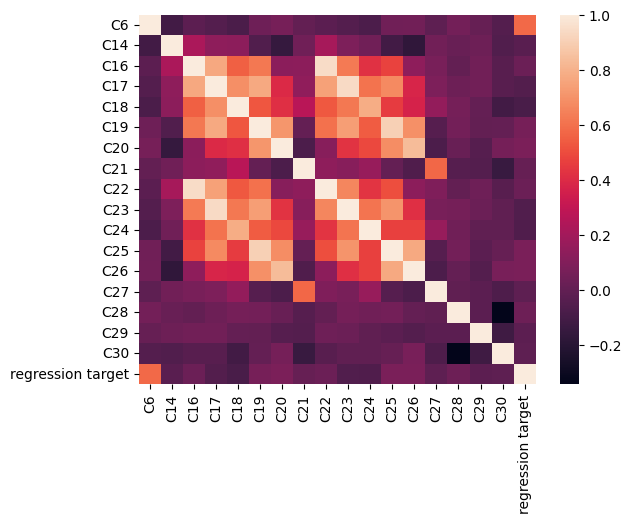

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_plot = sns.heatmap(correlation_dataset.corr())

plt.show()

### **[Q6] Initial Thoughts on Preprocessing**
* Based on the exploration, briefly outline the preprocessing steps that are necessary for the regression models or neural networks to run.
* Briefly discuss any specific challenges identified during exploration that are better addressed in preprocessing (those that do not affect running models, but might affect model performance).